# BigData Project 1
Global Terrorism Database Exploration


In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

data = pd.read_csv('./input/globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', low_memory=False)


The first step was to check what type and size of data was dealing with.

In [2]:
data.shape

(170350, 135)

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.get_dtype_counts()

float64    53
int64      24
object     58
dtype: int64

### Regions

It was decided to check data about the regions, how many they are and how they look on the map.

In [5]:
#Create array of the regions
regions = set(data['region'].unique())

print'Number of unique regions:', len(regions)

Number of unique regions: 12


C:\Users\Mysza\Miniconda3\envs\py27\lib\site-packages\mpl_toolkits\basemap\__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
C:\Users\Mysza\Miniconda3\envs\py27\lib\site-packages\mpl_toolkits\basemap\__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Mysza\Miniconda3\envs\py27\lib\site-packages\mpl_toolkits\basemap\__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


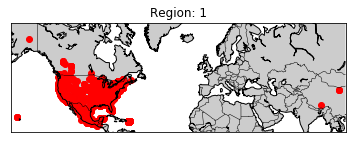

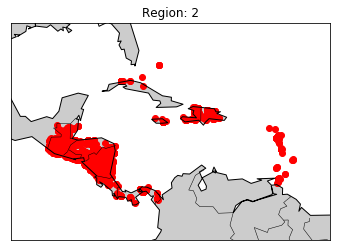

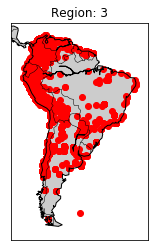

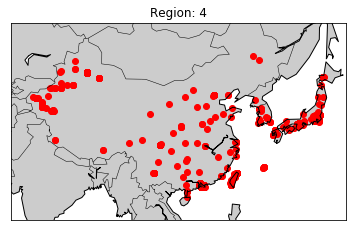

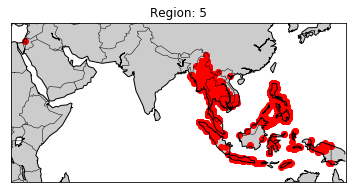

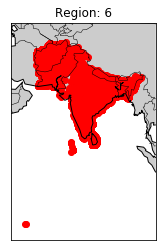

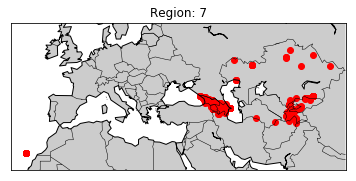

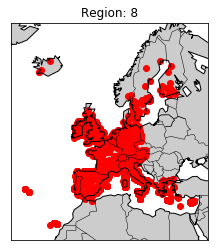

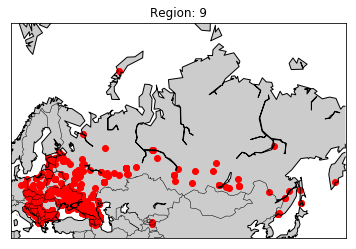

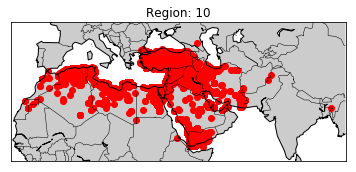

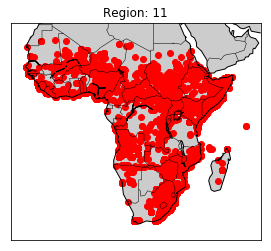

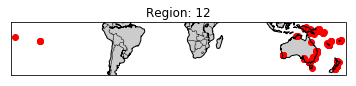

In [6]:
for region in regions:
    # Section out the region data.
    region_data = data[data['region'] == region]
    # Find each regions min and max coordinates.
    min_lat = region_data['latitude'].min() - 5
    max_lat = region_data['latitude'].max() + 5
    min_lon = region_data['longitude'].min() - 5
    max_lon = region_data['longitude'].max() + 5
    # Create a map from each min and max coordinate.
    m = Basemap(projection='merc',llcrnrlat=min_lat,urcrnrlat=max_lat,\
                llcrnrlon=min_lon,urcrnrlon=max_lon,lat_ts=20,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    x, y = m(region_data['longitude'].values, region_data['latitude'].values)
    m.fillcontinents(zorder=0)
    m.scatter(x, y, color='r')
    plt.title('Region: ' + str(region))
    plt.show()
    # Create borders and the sea.
    # display the terrorist attacks.

Question was how many attacks have occurred in each region.

In [7]:
data['region'].value_counts()

10    46511
6     41497
3     18762
8     16307
11    15491
5     11453
2     10340
9      5031
1      3346
4       794
7       554
12      264
Name: region, dtype: int64

Let's see the annual number of terrorist attacks in the world occured in years 1970-2016 and annual number of attacks in each region.

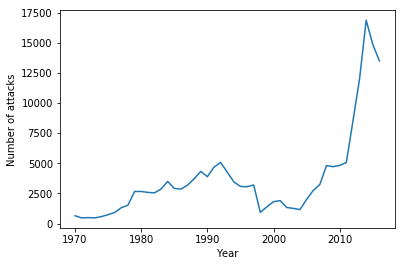

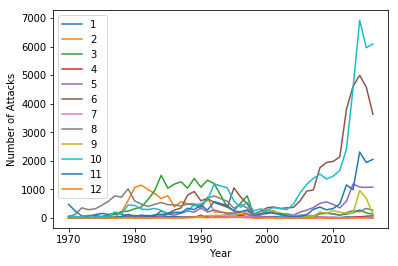

In [8]:
year_attacks = data['iyear'].value_counts().sort_index()
plt.plot(year_attacks.index, year_attacks)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.show()

# Loop through each region.
for region in regions:
    # Find the number off attacks by year for each region
    region_year_attacks = data[data['region'] == region]['iyear'].value_counts()
    # Sort it by the year so that it draws properly
    region_year_attacks = region_year_attacks.sort_index()
    plt.plot(region_year_attacks.index, region_year_attacks)
    
plt.legend(regions)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

It was also decided to check the dependence of the number of attacks on latitude and longitude.

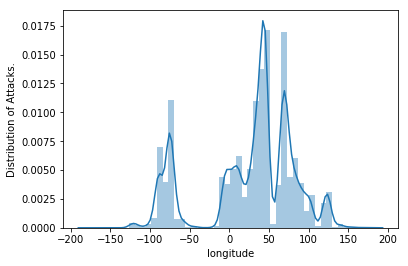

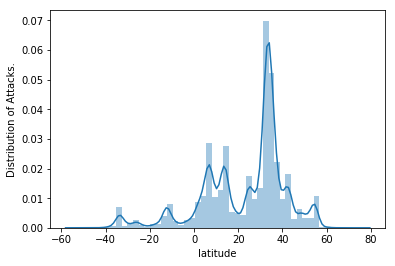

In [9]:
import seaborn as sns

sns.distplot(data['longitude'].dropna())
plt.ylabel('Distribution of Attacks.')
plt.show()
sns.distplot(data['latitude'].dropna())
plt.ylabel('Distribution of Attacks.')
plt.show()